# Problem  1

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
mnist = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split( mnist.data , mnist.target, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train , y_train, test_size=0.1, random_state=42)


In [ ]:
#@title see division
print('training items:',X_train.shape)
print('validation items:',X_val.shape)
print('testing items:',X_test.shape)

training items: (1082, 64)
validation items: (121, 64)
testing items: (594, 64)


# Part a of Problem 1

In [ ]:
def distance1(x,y):
    return np.sum(np.square(x-y))
def distance2(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
def distance3(x,y):
    return np.linalg.norm(x-y)

def kNN(x, k, data, label):  
    distances =[distance1(x,data[i]) for i in range(len(data))]
    idx = np.argpartition(distances, k)
    clas, freq = np.unique(label[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]


In [ ]:
def accuracy_set(data, label, train_data, train_label, k):
    cnt = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) == lab:
            cnt += 1
    return cnt/len(label)

In [ ]:
for k in range(1,30):
  k_acc = accuracy_set(X_val, y_val, X_train, y_train, k)
  print("k=%d, accuracy=%.2f%%" % (k, k_acc * 100))

k=1, accuracy=98.35%
k=2, accuracy=98.35%
k=3, accuracy=98.35%
k=4, accuracy=98.35%
k=5, accuracy=98.35%
k=6, accuracy=99.17%
k=7, accuracy=99.17%
k=8, accuracy=99.17%
k=9, accuracy=99.17%
k=10, accuracy=99.17%
k=11, accuracy=99.17%
k=12, accuracy=98.35%
k=13, accuracy=98.35%
k=14, accuracy=95.87%
k=15, accuracy=95.87%
k=16, accuracy=95.87%
k=17, accuracy=95.04%
k=18, accuracy=95.04%
k=19, accuracy=95.04%
k=20, accuracy=95.04%
k=21, accuracy=94.21%
k=22, accuracy=94.21%
k=23, accuracy=94.21%
k=24, accuracy=92.56%
k=25, accuracy=93.39%
k=26, accuracy=92.56%
k=27, accuracy=91.74%
k=28, accuracy=92.56%
k=29, accuracy=91.74%


So the first Best 'K' based of evaluating model on validation set is 1 !

In [ ]:
#@title Error rate in train set
cnt = 0
for x, lab in zip(X_train, y_train):
  if kNN(x, 6, X_train, y_train) == lab:
    cnt +=1

print('Error rate in train set is : ',  1 - (cnt/len(y_train)))

Error rate in train set is :  0.015711645101663563


In [ ]:
#@title Error rate in validation set
cnt = 0
for x, lab in zip(X_val, y_val):
  if kNN(x, 6, X_train, y_train) == lab:
    cnt +=1

print('Error rate in validation set is : ', 1 - (cnt/len(y_val)))

Error rate in validation set is :  0.008264462809917328


In [ ]:
#@title Error rate in test set
cnt = 0
for x, lab in zip(X_test, y_test):
  if kNN(x, 6, X_train, y_train) == lab:
    cnt +=1

print('Error rate in test set is : ', 1 - (cnt/len(y_test)))

Error rate in test set is :  0.008417508417508435


In [ ]:
#@title Confusion Matrix
cnfMatrix =  [ [ 0 for i in range(10) ] for j in range(10) ]
cnt = 0
for x, lab in zip(X_test, y_test):
  temp = kNN(x, 5, X_train, y_train)
  cnfMatrix[temp][lab] += 1
  if temp != lab:
    cnt+=1

print('Confusion Matrix for test set')
print(cnfMatrix)

Confusion Matrix for test set
[[55, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 55, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 52, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 56, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 64, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 72, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 57, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 62, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 52, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 65]]


Count TP, TN, FP, FN for each class to calculate precision and Recall and make the confusion matrix and What we have to do here is to find TP, TN, FP and FN for each individual class. 

In [ ]:
#@title Precision, Recall and F1_score
total_tp = 0
total_fp = 0
total_fn = 0
precision = 0
recall = 0
micro_f1score = 0
#This is called micro-averaged F1-score. 
#It is calculated by considering the total TP, total FP and total FN of the model. 
#It does not consider each class individually, It calculates the metrics globally.
macro_f1score = 0
for i in range(10):
  total_tp += cnfMatrix[i][i]
for i in range(10):
  for j in range(10):
    if (i!=j):
      total_fp += cnfMatrix[i][j]
      total_fn += cnfMatrix[j][i]

precision = total_tp/ (total_tp + total_fp)
recall = total_tp/ (total_tp + total_fn)
micro_f1score = 2 * (precision * recall)/(precision + recall)
print('micro f1 is : ',micro_f1score)
#As you can see When we are calculating the metrics globally 
#all the measures become equal. Also if you calculate accuracy you will see that:
#Precision = Recall = Micro F1 = Accuracy
#Macro F1:
#This is macro-averaged F1-score.
#It calculates metrics for each class individually and then takes unweighted mean of the measures.

tp = [0]*10
fp = [0]*10
fn = [0]*10
precision = [0]*10
recall = [0]*10
f1score = [0]*10
for i in range(10):
  tp[i] = cnfMatrix[i][i]
for i in range(10):
  for j in range(10):
    if (i!=j):
      fp[i] = cnfMatrix[i][j]
      fn[i] = cnfMatrix[j][i]

for i in range(len(f1score)):
  try:
    f1score[i] = 2 * ((precision[i] * recall[i])/(precision[i] + recall[i]))
  except ZeroDivisionError:
    f1score[i] = 100

macro_f1score = np.mean(f1score)
print('macro f1 is : ',macro_f1score)

micro f1 is :  0.9932659932659933
macro f1 is :  100.0


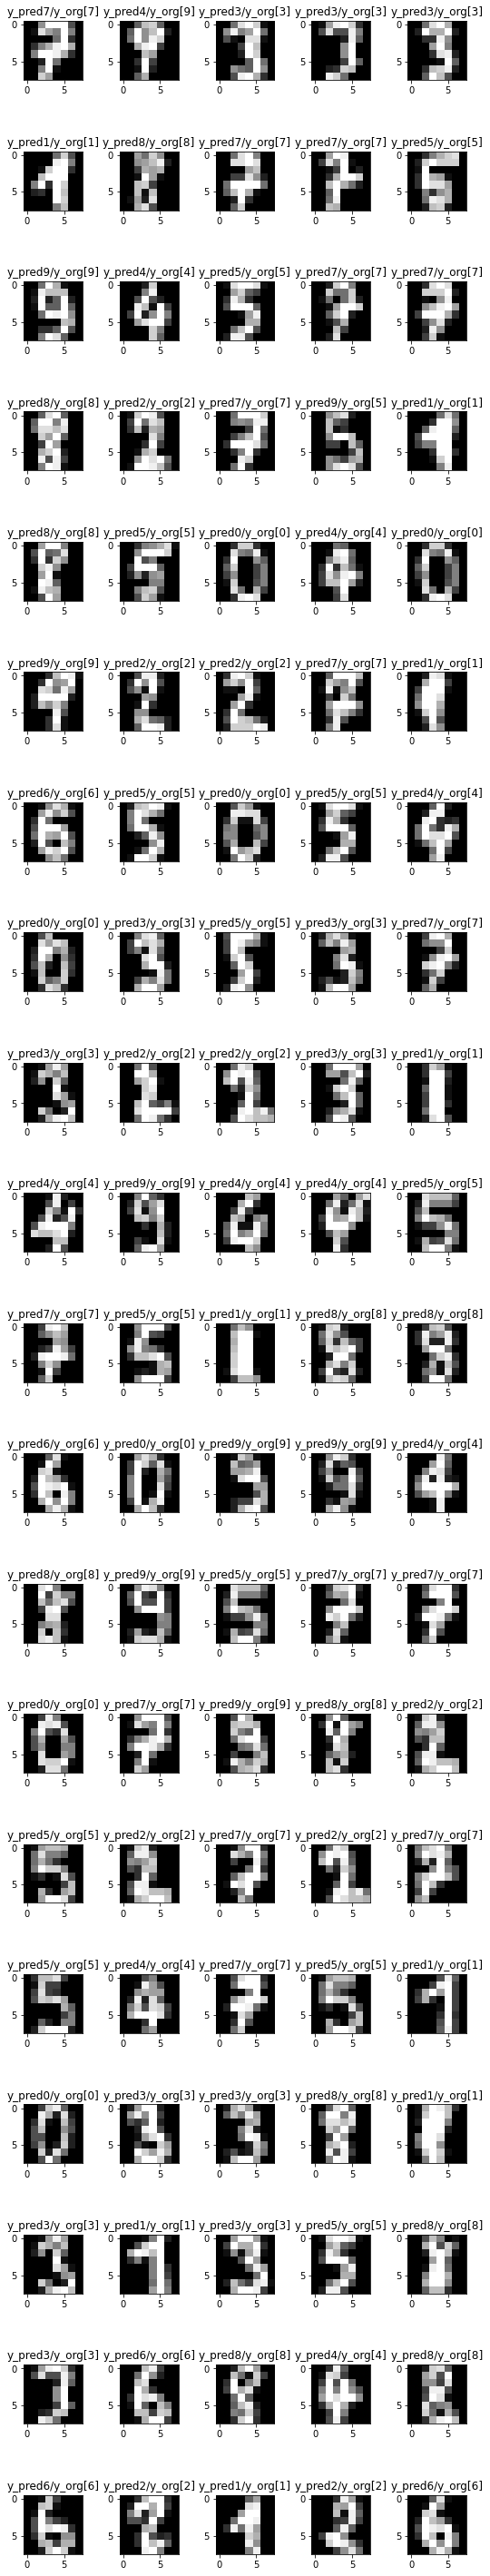

In [ ]:
#@title plot sample data and their predictions
import matplotlib.pyplot as plt
%matplotlib inline

num = 100
images = X_test 
labels = y_test

num_row = 20
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    j = np.random.choice(np.arange(0, len(y_test)), size = (1,))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[j].reshape((8,8)), cmap='gray')
    temp = kNN(images[j], 5, X_train,y_train)
    lbl = str(labels[j])
    string = 'y_pred'+str(temp)+'/y_org'+ lbl
    ax.set_title(string)
plt.tight_layout()
plt.show()



# Part b of Problem 1

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
kVals = np.arange(1,30)
accuracies = []

for k in kVals:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
    # evaluate the model and update the accuracies list
  score = model.score(X_val, y_val)
  print("k=%d, accuracy=%.10f%%" % (k, score * 100))
  accuracies.append(score)

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=1, accuracy=98.3471074380%
k=2, accuracy=98.3471074380%
k=3, accuracy=98.3471074380%
k=4, accuracy=98.3471074380%
k=5, accuracy=98.3471074380%
k=6, accuracy=98.3471074380%
k=7, accuracy=99.1735537190%
k=8, accuracy=99.1735537190%
k=9, accuracy=99.1735537190%
k=10, accuracy=99.1735537190%
k=11, accuracy=99.1735537190%
k=12, accuracy=99.1735537190%
k=13, accuracy=98.3471074380%
k=14, accuracy=95.8677685950%
k=15, accuracy=95.8677685950%
k=16, accuracy=95.8677685950%
k=17, accuracy=95.0413223140%
k=18, accuracy=95.0413223140%
k=19, accuracy=95.0413223140%
k=20, accuracy=95.0413223140%
k=21, accuracy=94.2148760331%
k=22, accuracy=93.3884297521%
k=23, accuracy=94.2148760331%
k=24, accuracy=92.5619834711%
k=25, accuracy=93.3884297521%
k=26, accuracy=92.5619834711%
k=27, accuracy=91.7355371901%
k=28, accuracy=92.5619834711%
k=29, accuracy=91.7355371901%
k=7 achieved highest accuracy of 99.17% on validation data


So the Best 'K' is 7 now!

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        52
           3       0.98      1.00      0.99        56
           4       0.98      1.00      0.99        64
           5       0.99      0.97      0.98        73
           6       0.98      1.00      0.99        57
           7       1.00      1.00      1.00        62
           8       1.00      0.94      0.97        52
           9       0.97      0.96      0.96        68

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Confusion matrix
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0 71  1  0  0  1]

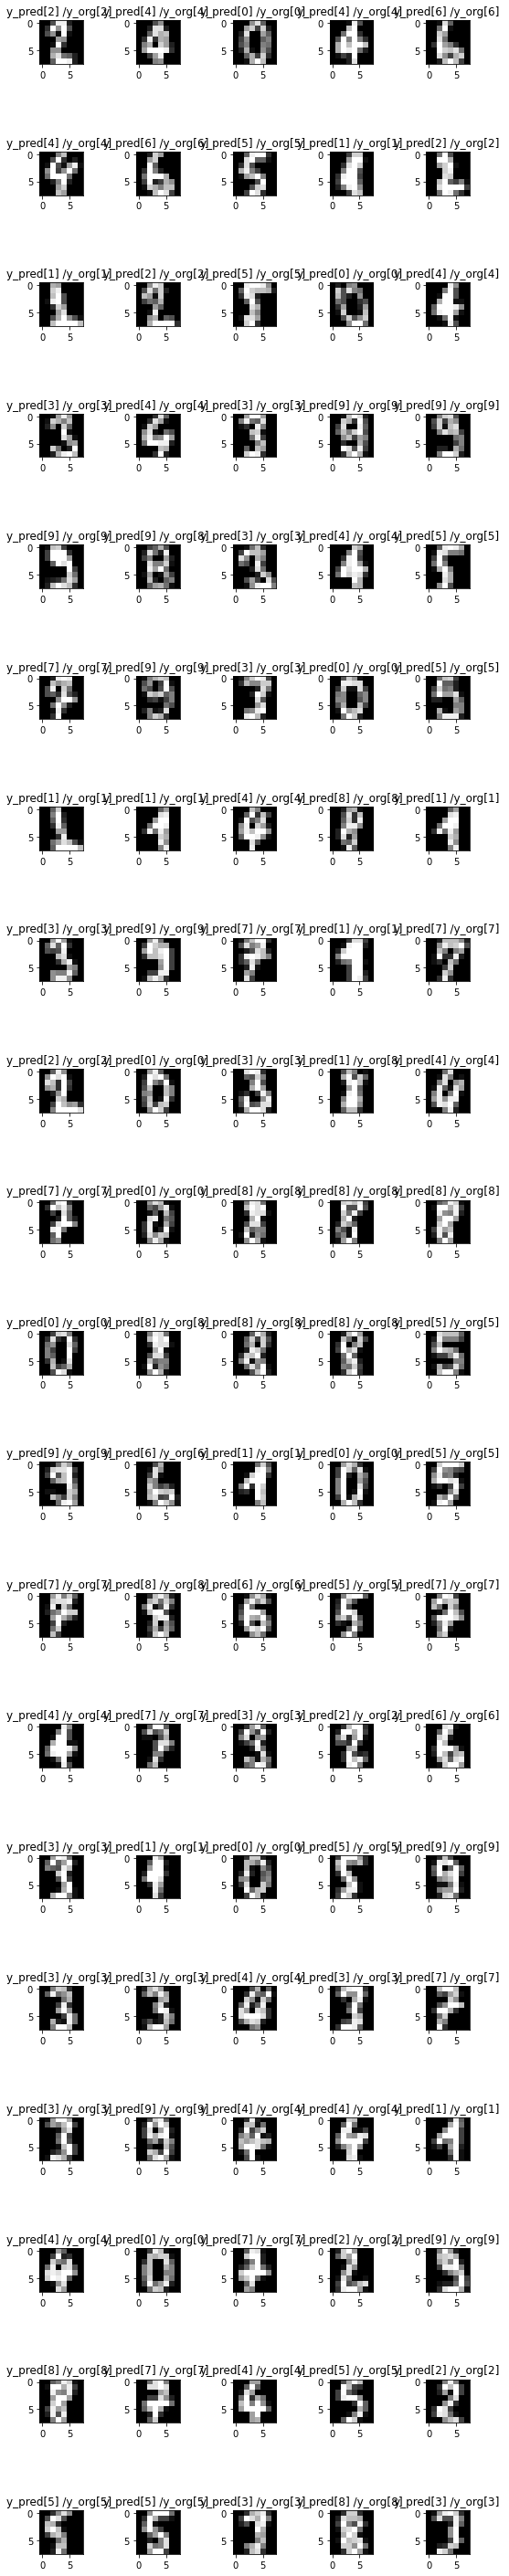

In [ ]:
#@title plot sample data and their predictions
import matplotlib.pyplot as plt
%matplotlib inline

num = 100
images = X_test 
labels = y_test

num_row = 20
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    j = np.random.choice(np.arange(0, len(y_test)), size = (1,))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[j].reshape((8,8)), cmap='gray')
    temp = model.predict(images[j])
    lbl = str(labels[j])
    string = 'y_pred'+str(temp)+' /y_org'+ lbl+ ' '
    ax.set_title(string)
plt.tight_layout()
plt.show()

# Problem 2

# Part a of Problem 2

In this part, a data set is used which is divided into 3 groups based on a qualitative variable or categories of observations. Other quantitative variables include 13 numerical properties that are considered related to this category or groups. Since some of these variables may correlate with each other and cause "overfitting" in the model, we want to use PCA technique to separate them into new components or variables that have the least dependence, so that Maintain the most variance. On the other hand, to adjust the model parameters and determine the classification accuracy, we will separate the data into two parts: train and test. The following code is used to call this data set from the Internet and separate it into two sections.

Since each of these data has a different measurement scale, it is necessary to eliminate the measurement scale. we use the z-score standardization method, which converts the data into a form with a mean of zero and a unit variance (one). The following code performs these calculations on training and test data.

In [35]:
from math import sqrt
from math import pi
from math import exp
from random import seed
from random import randrange
import numpy as np
import math


def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[0]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return np.sqrt(variance)

def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[0])
	return summaries

def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries


def calculate_probability(x, mean, stdev):
  expo = exp(-((x-mean)**2/(2*stdev**2)))
  tmp = (1 / (sqrt(2*pi)*stdev)) * expo
  return tmp

def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i+1], mean, stdev)
	return probabilities


def cross_validation_split(dataset, n_folds):
  dataset_split = list()
  dataset_copy = dataset.copy()
  fold_size = int(len(dataset) / n_folds)
  for _ in range(n_folds):
    fold = list()
    while len(fold) < fold_size:
      index = randrange(len(dataset_copy))
      tmp = dataset_copy.iloc[index]
      dataset_copy = dataset_copy.drop(tmp.name)
      fold.append(list(tmp))
    dataset_split.append(fold)
  return dataset_split

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 

def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  folds = np.array(cross_validation_split(dataset, n_folds))
  scores = list()
  for i, fold in enumerate(folds):
    train_set = folds.copy()
    train_set = np.delete(train_set, i, 0)
    train_set = train_set.reshape(-1, 14)
    test_set = list()
    for row in fold:
      row_copy = row.copy()
      test_set.append(row_copy)
      row_copy[0] = None
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[0] for row in fold]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
  return scores

def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label
 

def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)
 

In [ ]:
import pandas as pd

seed(1)
dataset = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
    header=None,
    )

from sklearn import preprocessing
temp = dataset.loc[:,1:13]
temp2 = dataset.loc[:,:0].to_numpy()
std_scale = preprocessing.StandardScaler().fit(temp)
dataset = std_scale.transform(temp)
dataset = np.append(temp2, dataset, axis=1)
dataset = pd.DataFrame(dataset)

n_folds = 6
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [96.55172413793103, 96.55172413793103, 100.0, 93.10344827586206, 96.55172413793103, 100.0]
Mean Accuracy: 97.126%


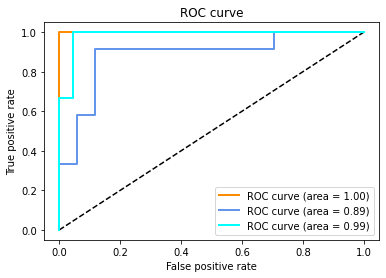

In [37]:
folds = np.array(cross_validation_split(dataset, n_folds))
scores = list()

i = 3

train_set = folds.copy()
train_set = np.delete(train_set, i, 0)
train_set = train_set.reshape(-1, 14)
test_set = list()
actual = np.zeros((len(folds[i]), 3))
predictions = np.zeros((len(folds[i]), 3))
summarize = summarize_by_class(train_set)
for i, row in enumerate(folds[i]):
  row_copy = row.copy()
  actual[i][int(row[0])-1] = 1
  test_set.append(row_copy)
  row_copy[0] = None
  t = calculate_class_probabilities(summarize, row_copy)
  predictions[i, :] = [t[1], t[2], t[3]]

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# calculate roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
  fpr[i], tpr[i], _ = roc_curve(actual[:, i], predictions[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='cornflowerblue',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='aqua',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Problem 3

In [ ]:
import numpy as np
from scipy import optimize
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model

dataset = datasets.load_digits()
print('size of dataset', len(dataset.data))
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size= 0.33, random_state=42)
print('size of training set',len(X_train))
print('size of testing set',len(X_test))


size of dataset 1797
size of training set 1203
size of testing set 594


In [ ]:
out0 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 0:
    out0[i] = 1


out1 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 1:
    out1[i] = 1


out2 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 2:
    out2[i] = 1


out3 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 3:
    out3[i] = 1


out4 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 4:
    out4[i] = 1


out5 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 5:
    out5[i] = 1


out6= [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 6:
    out6[i] = 1


out7 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 7:
    out7[i] = 1


out8 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 8:
    out8[i] = 1


out9 = [0] * len (y_train)
for i in range(len(y_train)):
  if y_train[i] == 9:
    out9[i] = 1



In [ ]:
from sklearn.linear_model import LogisticRegression
from IPython.display import clear_output

model0 =LogisticRegression(random_state=0).fit(X_train, out0)
model1 =LogisticRegression(random_state=0).fit(X_train, out1)
model2 =LogisticRegression(random_state=0).fit(X_train, out2)
model3 =LogisticRegression(random_state=0).fit(X_train, out3)
model4 =LogisticRegression(random_state=0).fit(X_train, out4)
model5 =LogisticRegression(random_state=0).fit(X_train, out5)
model6 =LogisticRegression(random_state=0).fit(X_train, out6)
model7 =LogisticRegression(random_state=0).fit(X_train, out7)
model8 =LogisticRegression(random_state=0).fit(X_train, out8)
model9 =LogisticRegression(random_state=0).fit(X_train, out9)

predict_test = [0] * len(y_test)

for i in range (len(X_test)):

  score = [0] * 10
  
  score[0] = model0.predict_proba([X_test[i]])[0][1]
  
  score[1] = model1.predict_proba([X_test[i]])[0][1]
  
  score[2] = model2.predict_proba([X_test[i]])[0][1]
  
  score[3] = model3.predict_proba([X_test[i]])[0][1]
  
  score[4] = model4.predict_proba([X_test[i]])[0][1]
  
  score[5] = model5.predict_proba([X_test[i]])[0][1]
  
  score[6] = model6.predict_proba([X_test[i]])[0][1]
  
  score[7] = model7.predict_proba([X_test[i]])[0][1]
  
  score[8] = model8.predict_proba([X_test[i]])[0][1]
  
  score[9] = model9.predict_proba([X_test[i]])[0][1]
  
  predict_test[i] = np.argmax(score)

clear_output(wait=True)
print('Done!')

Done!


Part a of Problem 3

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predict_test)
cm

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 48,  1,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0, 69,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5, 63]])

In [ ]:
predict_train = [0] * len(y_train)

for i in range (len(X_train)):

  score = [0] * 10
  
  score[0] = model0.predict_proba([X_train[i]])[0][1]
  
  score[1] = model1.predict_proba([X_train[i]])[0][1]
  
  score[2] = model2.predict_proba([X_train[i]])[0][1]
  
  score[3] = model3.predict_proba([X_train[i]])[0][1]
  
  score[4] = model4.predict_proba([X_train[i]])[0][1]
  
  score[5] = model5.predict_proba([X_train[i]])[0][1]
  
  score[6] = model6.predict_proba([X_train[i]])[0][1]
  
  score[7] = model7.predict_proba([X_train[i]])[0][1]
  
  score[8] = model8.predict_proba([X_train[i]])[0][1]
  
  score[9] = model9.predict_proba([X_train[i]])[0][1]
  
  predict_train[i] = np.argmax(score)

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, predict_test)
print('Error on predicting test set: ',1-acc)
acc = metrics.accuracy_score(y_train, predict_train)
print('Error on predicting training set: ',1-acc)

Error on predicting test set:  0.03872053872053871
Error on predicting training set:  0.0033250207813798616


Part b of Problem 3

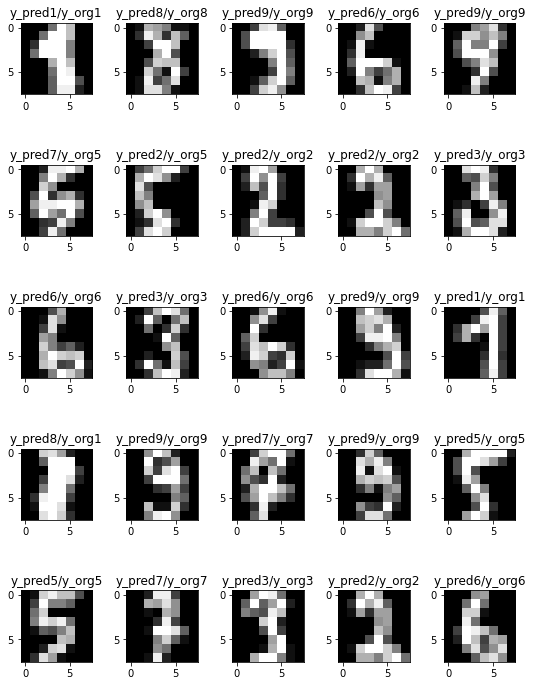

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

num = 25
images = X_test 
labels = y_test

samples = np.random.randint(1,len(X_test),25)
predict_samples = [0] * len(samples)
for i in range (len(samples)):

  score = [0] * 10
  
  score[0] = model0.predict_proba([X_test[samples[i]]])[0][1]
  
  score[1] = model1.predict_proba([X_test[samples[i]]])[0][1]
  
  score[2] = model2.predict_proba([X_test[samples[i]]])[0][1]
  
  score[3] = model3.predict_proba([X_test[samples[i]]])[0][1]
  
  score[4] = model4.predict_proba([X_test[samples[i]]])[0][1]
  
  score[5] = model5.predict_proba([X_test[samples[i]]])[0][1]
  
  score[6] = model6.predict_proba([X_test[samples[i]]])[0][1]
  
  score[7] = model7.predict_proba([X_test[samples[i]]])[0][1]
  
  score[8] = model8.predict_proba([X_test[samples[i]]])[0][1]
  
  score[9] = model9.predict_proba([X_test[samples[i]]])[0][1]
  
  predict_samples[i] = np.argmax(score)

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_test[samples[i]].reshape((8,8)), cmap='gray')
    temp = predict_samples[i]
    lbl = str(y_test[samples[i]])
    string = 'y_pred'+str(temp)+'/y_org'+ lbl
    ax.set_title(string)
plt.tight_layout()
plt.show()

Part c & d are in the report ...